___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

#To ignore warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

#Visualization settings
plt.rcParams["figure.figsize"] = (10, 6)
sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [18]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [19]:
print(f"There are {len(X_train)} images in the training dataset")
print(f"There are {len(X_test)} images in the test dataset")

There are 60000 images in the training dataset
There are 10000 images in the test dataset


In [20]:
# Checking the shape of one image
X_train[3].shape

(28, 28)

In [21]:
X_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,  33,  96, 175, 156,  64,
         14,  54, 137, 204, 194, 102,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  73, 186, 177, 183, 175, 188, 232,
        255, 223, 219, 194, 179, 186, 213, 146,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  35, 163, 140, 150, 152, 150, 146, 175,
        175, 173, 171, 156, 152, 148, 129, 156, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 150, 142, 140, 152, 160, 156, 146, 142,
        127, 135, 133, 140, 140, 137, 133, 125, 169,  75,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  54, 167, 146, 129, 142, 137, 137, 131,
        148, 148, 133, 131, 131, 131, 125, 140, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 110, 188, 133, 146, 152, 133, 125,
        127, 119, 129, 133, 119, 140, 131, 150,  14,   0,   0,   0,   0,
          0,   0],
       [  

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

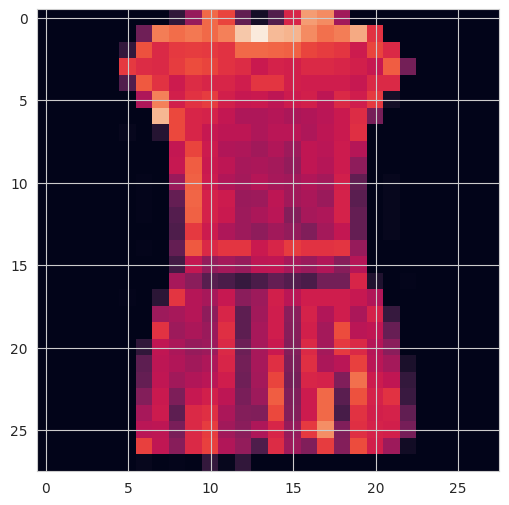

In [22]:
#Show one image of the training data
plt.imshow(X_train[3])
plt.show()

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

In [23]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [24]:
#print the image with index 3
y_train[3]

3

In [25]:
#print the class of index 3
classes[int(y_train[3])]

'Dress'

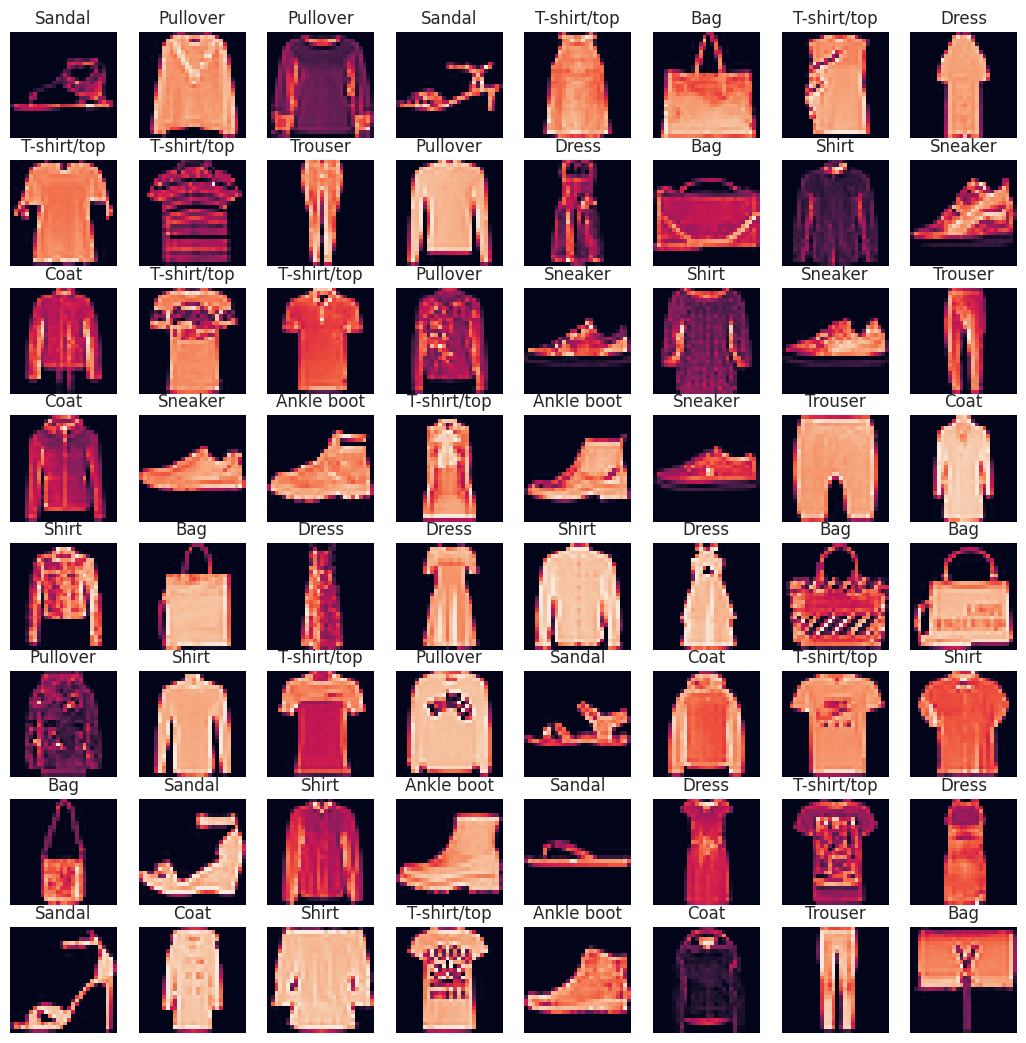

In [26]:
#plot a random sample of the data with their classes
fig, axes = plt.subplots(8, 8)
fig.set_size_inches(13, 13)
for ax in axes.flatten():
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    ax.axis("off")
    ax.set_title(classes[int(y_train[rand_index])])
    ax.imshow(X_train[rand_index])
plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [27]:
#print the min and max values for one image, to use them in scaling the data
X_train[1].min()

0

In [28]:
X_train[1].max()

255

In [87]:
# Normalize image pixels

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

In [88]:
X_train[1].min()

0.0

In [89]:
X_train[1].max()

1.0

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [90]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [91]:
np.expand_dims(X_train, 3).shape

(60000, 28, 28, 1)

In [92]:
x_train = np.expand_dims(X_train, 3)
x_test = np.expand_dims(X_test, 3)

In [93]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [94]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [95]:
from tensorflow.keras.utils import to_categorical

In [96]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [97]:
y_train[0]

9

In [98]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

## **Modeling**

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [100]:
model = Sequential()

model.add(
    Conv2D(
        filters=28,
        kernel_size=(3, 3), # feature detector. filter
        input_shape=(28, 28, 1),
        activation="relu",
        padding="same",
    )
)

model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

##  Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [101]:
from tensorflow.keras.callbacks import EarlyStopping

In [129]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", patience=4, restore_best_weights=True)

In [130]:
model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=100,
    validation_split=0.10,
    callbacks=[early_stop],
)

Epoch 1/100
1688/1688 [==============================] - 89s 53ms/step - loss: 0.1496 - accuracy: 0.9456 - val_loss: 0.2894 - val_accuracy: 0.9078
Epoch 2/100
1688/1688 [==============================] - 88s 52ms/step - loss: 0.1305 - accuracy: 0.9534 - val_loss: 0.3107 - val_accuracy: 0.9053
Epoch 3/100
1688/1688 [==============================] - 90s 53ms/step - loss: 0.1163 - accuracy: 0.9591 - val_loss: 0.2965 - val_accuracy: 0.9022
Epoch 4/100
1688/1688 [==============================] - 88s 52ms/step - loss: 0.1008 - accuracy: 0.9646 - val_loss: 0.3041 - val_accuracy: 0.9102
Epoch 5/100
1688/1688 [==============================] - 89s 53ms/step - loss: 0.0892 - accuracy: 0.9691 - val_loss: 0.3357 - val_accuracy: 0.9137


**TASK 7: Plot values of metrics you used in your model.**

In [131]:
model.metrics_names

['loss', 'accuracy']

In [138]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.150,0.946,0.289,0.908
1,0.130,0.953,0.311,0.905
2,0.116,0.959,0.296,0.902
3,0.101,0.965,0.304,0.910
4,0.089,0.969,0.336,0.914


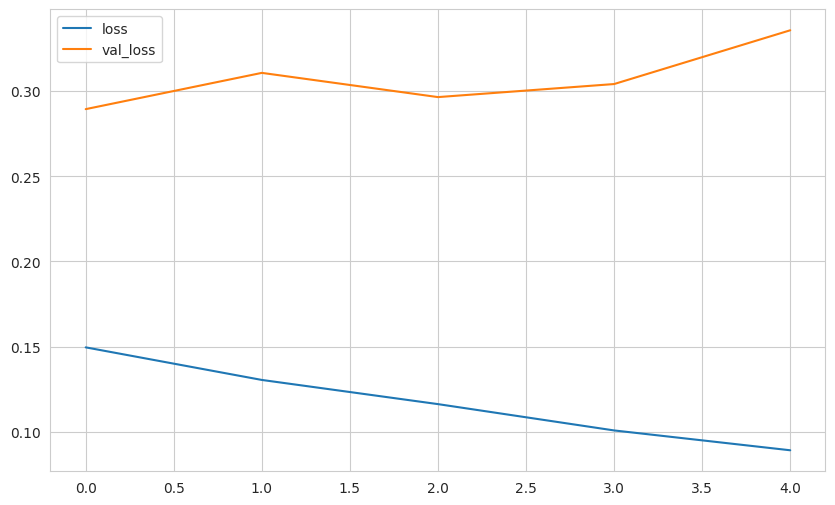

In [139]:
summary[["loss", "val_loss"]].plot()
plt.show()

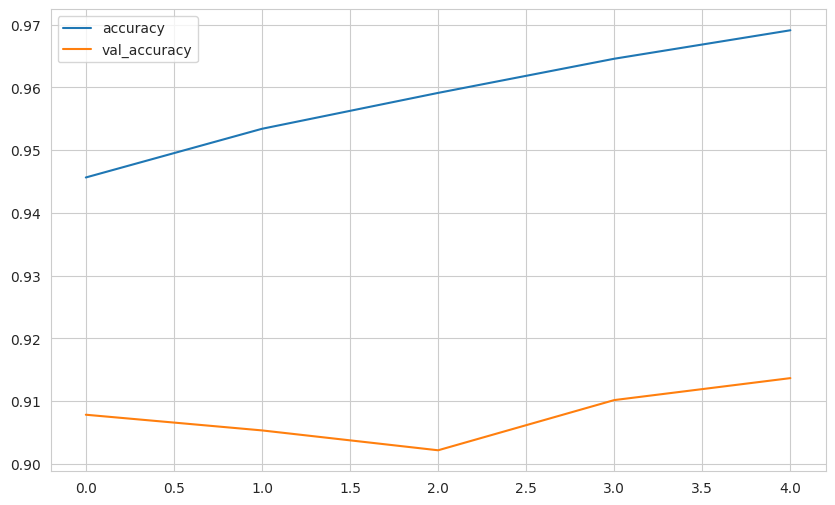

In [140]:
summary[["accuracy", "val_accuracy"]].plot()
plt.show()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [141]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    multilabel_confusion_matrix,
)

In [142]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.2949 - accuracy: 0.9041


[0.29486456513404846, 0.9041000008583069]

In [143]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.29486456513404846
Test accuracy: 0.9041000008583069


In [144]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 4s 11ms/step


array([[2.7076894e-07, 3.1303571e-08, 2.7843805e-06, ..., 3.1274301e-04,
        6.6803691e-06, 9.9962014e-01],
       [6.3217112e-07, 2.2833219e-13, 9.9999648e-01, ..., 8.7534910e-12,
        5.5473044e-12, 5.3475402e-10],
       [5.7411897e-09, 9.9999994e-01, 1.3473224e-10, ..., 2.0954715e-11,
        2.0682952e-11, 2.0782059e-10],
       ...,
       [3.3142273e-09, 2.5914262e-14, 4.4583834e-10, ..., 3.1250598e-09,
        9.9999458e-01, 8.1625863e-13],
       [5.6578409e-10, 9.9999994e-01, 4.8432373e-11, ..., 1.1493624e-12,
        1.9648361e-12, 3.4434164e-10],
       [4.6645486e-04, 4.3437263e-05, 2.5950995e-04, ..., 8.4691167e-02,
        5.9318924e-03, 1.8575414e-03]], dtype=float32)

In [145]:
pred_prob.shape

(10000, 10)

In [146]:
pred_prob[5]

array([1.1195543e-06, 9.9999768e-01, 4.1126892e-08, 1.4624506e-07,
       1.5880444e-07, 7.2742825e-09, 7.5399805e-07, 5.4114206e-09,
       6.8553355e-08, 1.0341714e-09], dtype=float32)

In [147]:
np.argmax(pred_prob[5])

1

In [148]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [149]:
y_pred.shape

(10000,)

In [150]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85      1000
           1       0.98      0.99      0.99      1000
           2       0.91      0.75      0.82      1000
           3       0.94      0.87      0.90      1000
           4       0.78      0.91      0.84      1000
           5       0.97      0.99      0.98      1000
           6       0.70      0.81      0.75      1000
           7       0.97      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



In [151]:
print(confusion_matrix(y_test, y_pred))

[[815   0  14   8   6   3 145   0   9   0]
 [  1 986   0   4   3   0   5   0   1   0]
 [ 13   0 748   5 133   0 101   0   0   0]
 [ 16  12   9 871  48   0  42   0   2   0]
 [  0   2  26  15 912   1  44   0   0   0]
 [  0   0   0   0   0 990   0   7   0   3]
 [ 73   1  27  16  68   0 808   0   7   0]
 [  0   0   0   0   0  14   0 958   0  28]
 [  3   1   0   6   1   2   4   1 982   0]
 [  0   0   0   0   0   7   1  21   0 971]]


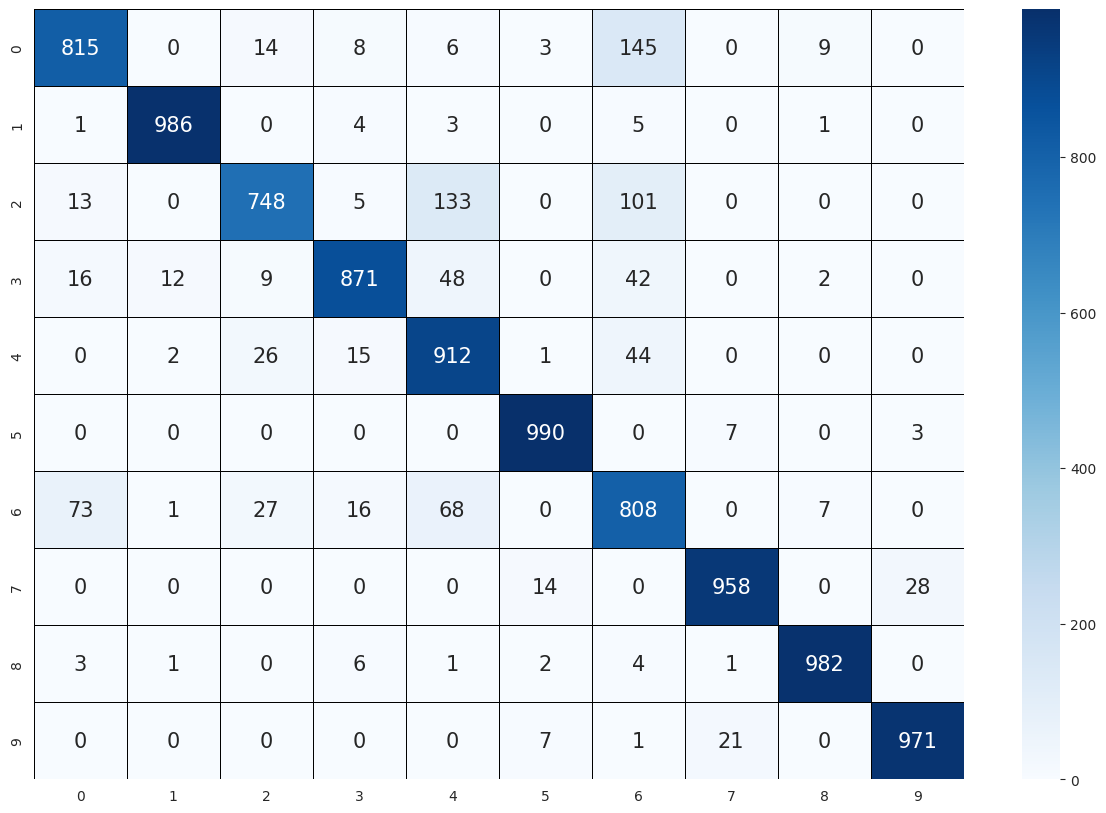

In [152]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
)
plt.show()

In [153]:
# y_test != y_pred
np.not_equal(y_test, y_pred)

array([False, False, False, ..., False, False, False])

In [154]:
# (y_test != y_pred).sum()
np.not_equal(y_test, y_pred).sum()

959

In [155]:
np.equal(y_test, y_pred).sum()

9041

## Prediction

In [156]:
fashion_sample = X_test[7]

In [157]:
fashion_sample.shape

(28, 28)

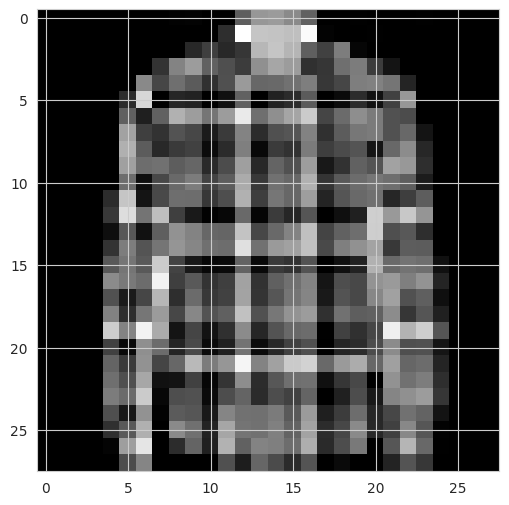

In [158]:
plt.imshow(fashion_sample, cmap="gray")
plt.show()

In [159]:
np.expand_dims(fashion_sample, 0).shape

(1, 28, 28)

In [160]:
pred_prob = model.predict(np.expand_dims(fashion_sample, 0))
pred_prob

1/1 [==============================] - 0s 21ms/step


array([[1.7887757e-08, 3.6731129e-10, 1.2223743e-06, 1.2418400e-07,
        2.1073483e-05, 1.0908599e-10, 9.9997723e-01, 1.0998834e-10,
        3.0532993e-07, 4.5450371e-12]], dtype=float32)

In [161]:
# SHAPE --> (num_images, width, height, color_channels)
y_pred = np.argmax(pred_prob)
y_pred

6

As a result, the model correctly predict the sample as a 6 class which is shirt ✅

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___